# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [13]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [14]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [15]:
# Calculate Click-Through Rates (CTR)
ctr_a = clicks_a / visitors_a
ctr_b = clicks_b / visitors_b

print(f"Version A: {visitors_a} visitors, {clicks_a} clicks, CTR = {ctr_a:.3f} ({ctr_a*100:.1f}%)")
print(f"Version B: {visitors_b} visitors, {clicks_b} clicks, CTR = {ctr_b:.3f} ({ctr_b*100:.1f}%)")
print(f"Difference: {ctr_b - ctr_a:.3f} ({(ctr_b - ctr_a)*100:.1f} percentage points)")

Version A: 1000 visitors, 150 clicks, CTR = 0.150 (15.0%)
Version B: 1050 visitors, 180 clicks, CTR = 0.171 (17.1%)
Difference: 0.021 (2.1 percentage points)


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [16]:
# Null Hypothesis (H₀): CTR_B = CTR_A (no difference between versions)
# Alternative Hypothesis (H₁): CTR_B ≠ CTR_A (there is a difference between versions)

print("H₀: CTR_B = CTR_A (no difference between versions)")
print("H₁: CTR_B ≠ CTR_A (there is a difference between versions)")
print("Significance level: α = 0.05")

H₀: CTR_B = CTR_A (no difference between versions)
H₁: CTR_B ≠ CTR_A (there is a difference between versions)
Significance level: α = 0.05



- Run the Test

In [17]:
# Create contingency table for Chi-Square test
contingency_table = np.array([
    [clicks_a, visitors_a - clicks_a],  # Version A: [clicks, non-clicks]
    [clicks_b, visitors_b - clicks_b]   # Version B: [clicks, non-clicks]
])

print("Contingency Table:")
print("                Clicks    No Clicks    Total")
print(f"Version A:      {clicks_a:6d}     {visitors_a - clicks_a:6d}     {visitors_a:4d}")
print(f"Version B:      {clicks_b:6d}     {visitors_b - clicks_b:6d}     {visitors_b:4d}")

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"Chi-Square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:")
print(expected)

Contingency Table:
                Clicks    No Clicks    Total
Version A:         150        850     1000
Version B:         180        870     1050

Chi-Square Test Results:
Chi-Square statistic: 1.5863
P-value: 0.2079
Degrees of freedom: 1
Expected frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]


> Interpret Results

In [18]:
# Interpret the results
alpha = 0.05

print(f"Statistical Test Interpretation:")
print(f"P-value ({p_value:.4f}) vs Alpha ({alpha})")

if p_value < alpha:
    print("✓ REJECT the null hypothesis")
    print("✓ The difference in CTR between versions is statistically significant")
    print("✓ Version B performs significantly better than Version A")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("✗ The difference in CTR between versions is NOT statistically significant")
    print("✗ No sufficient evidence that Version B performs better than Version A")

print(f"\nConclusion:")
print(f"With p-value = {p_value:.4f} > α = {alpha}, we do not have sufficient statistical evidence")
print(f"to conclude that Version B (CTR = {ctr_b:.1%}) performs significantly better than")
print(f"Version A (CTR = {ctr_a:.1%}), despite the observed {(ctr_b-ctr_a)*100:.1f} percentage point difference.")

Statistical Test Interpretation:
P-value (0.2079) vs Alpha (0.05)
✗ FAIL TO REJECT the null hypothesis
✗ The difference in CTR between versions is NOT statistically significant
✗ No sufficient evidence that Version B performs better than Version A

Conclusion:
With p-value = 0.2079 > α = 0.05, we do not have sufficient statistical evidence
to conclude that Version B (CTR = 17.1%) performs significantly better than
Version A (CTR = 15.0%), despite the observed 2.1 percentage point difference.


📈 Visualization

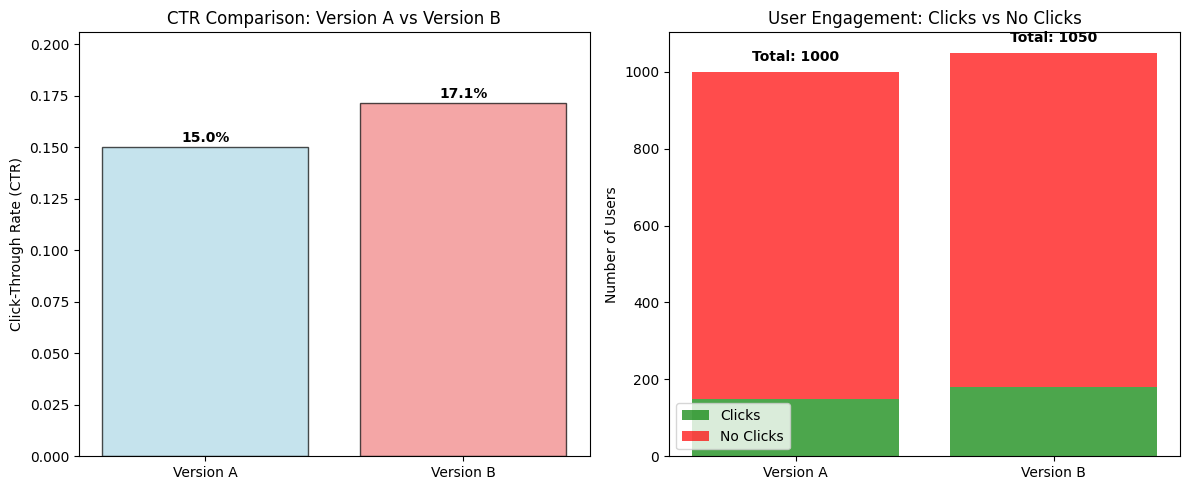


Detailed Results Summary:
Version A: 150/1000 = 0.1500 (15.0%)
Version B: 180/1050 = 0.1714 (17.1%)
Absolute difference: 0.0214 (2.1%)
Relative improvement: 14.3%
Chi-square statistic: 1.5863
P-value: 0.2079
Statistical significance (α=0.05): No


In [19]:
# Create visualization comparing CTRs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart comparing CTRs
versions = ['Version A', 'Version B']
ctrs = [ctr_a, ctr_b]
colors = ['lightblue', 'lightcoral']

bars = ax1.bar(versions, ctrs, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Click-Through Rate (CTR)')
ax1.set_title('CTR Comparison: Version A vs Version B')
ax1.set_ylim(0, max(ctrs) * 1.2)

# Add value labels on bars
for bar, ctr in zip(bars, ctrs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{ctr:.1%}', ha='center', va='bottom', fontweight='bold')

# Stacked bar chart showing clicks vs non-clicks
categories = ['Version A', 'Version B']
clicks = [clicks_a, clicks_b]
non_clicks = [visitors_a - clicks_a, visitors_b - clicks_b]

ax2.bar(categories, clicks, label='Clicks', color='green', alpha=0.7)
ax2.bar(categories, non_clicks, bottom=clicks, label='No Clicks', color='red', alpha=0.7)
ax2.set_ylabel('Number of Users')
ax2.set_title('User Engagement: Clicks vs No Clicks')
ax2.legend()

# Add total visitor counts
for i, (cat, total) in enumerate(zip(categories, [visitors_a, visitors_b])):
    ax2.text(i, total + 20, f'Total: {total}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional statistical information
print(f"\nDetailed Results Summary:")
print(f"Version A: {clicks_a}/{visitors_a} = {ctr_a:.4f} ({ctr_a:.1%})")
print(f"Version B: {clicks_b}/{visitors_b} = {ctr_b:.4f} ({ctr_b:.1%})")
print(f"Absolute difference: {abs(ctr_b - ctr_a):.4f} ({abs(ctr_b - ctr_a):.1%})")
print(f"Relative improvement: {((ctr_b - ctr_a) / ctr_a) * 100:.1f}%")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistical significance (α=0.05): {'Yes' if p_value < 0.05 else 'No'}")

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [20]:
# Import Libraries for Challenge 2
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2
from statsmodels.stats.proportion import proportions_ztest

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [21]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [22]:
# Explore the data first
print("Dataset shape:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

print("\nTest groups:")
print(data['test group'].value_counts())

print("\nConversion rates by group:")
conversion_by_group = data.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])
conversion_by_group.columns = ['Total Users', 'Conversions', 'Conversion Rate']
print(conversion_by_group)

# Calculate conversion rates
group_a = data[data['test group'] == 'ad']
group_b = data[data['test group'] == 'psa']

conversions_a = group_a['converted'].sum()
total_a = len(group_a)
conversion_rate_a = conversions_a / total_a

conversions_b = group_b['converted'].sum()
total_b = len(group_b)
conversion_rate_b = conversions_b / total_b

print(f"\nDetailed Analysis:")
print(f"Group A (ad): {conversions_a:,} conversions out of {total_a:,} users = {conversion_rate_a:.4f} ({conversion_rate_a:.2%})")
print(f"Group B (psa): {conversions_b:,} conversions out of {total_b:,} users = {conversion_rate_b:.4f} ({conversion_rate_b:.2%})")
print(f"Difference: {conversion_rate_b - conversion_rate_a:.4f} ({(conversion_rate_b - conversion_rate_a):.2%})")

Dataset shape: (588101, 7)

Column names: ['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']

First few rows:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  

Test groups:
test group
ad     564577
psa     23524
Name: count, dtype: int64

Conversion rates by group:
            Total Users  Conversions  Conversion Rate
test group                                           
ad               564577        14423         0.025547
psa               23524   

> Statistical Test

In [23]:
# Perform statistical test using Chi-Square test
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Create contingency table
contingency_table = np.array([
    [conversions_a, total_a - conversions_a],  # Group A: [conversions, non-conversions]
    [conversions_b, total_b - conversions_b]   # Group B: [conversions, non-conversions]
])

print("Contingency Table:")
print("                Conversions    No Conversions    Total")
print(f"Group A (ad):      {conversions_a:8d}       {total_a - conversions_a:8d}   {total_a:6d}")
print(f"Group B (psa):     {conversions_b:8d}       {total_b - conversions_b:8d}   {total_b:6d}")

# Chi-Square test
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"Chi-Square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi2:.6f}")
print(f"Degrees of freedom: {dof}")

# Z-test for proportions (alternative approach)
counts = np.array([conversions_a, conversions_b])
nobs = np.array([total_a, total_b])
z_stat, p_value_z = proportions_ztest(counts, nobs)

print(f"\nZ-test for Proportions:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_z:.6f}")

# Interpretation
alpha = 0.05
print(f"\nStatistical Interpretation (α = {alpha}):")
if p_value_chi2 < alpha:
    print("✓ REJECT the null hypothesis")
    print("✓ There IS a statistically significant difference in conversion rates")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("✗ There is NO statistically significant difference in conversion rates")

print(f"\nConclusion:")
print(f"The ad group has a conversion rate of {conversion_rate_a:.2%}, while the PSA group has {conversion_rate_b:.2%}.")
print(f"The ad group performs better by {abs(conversion_rate_a - conversion_rate_b):.2%} percentage points.")
print(f"With p-value = {p_value_chi2:.6f} {'<' if p_value_chi2 < alpha else '>'} α = {alpha}, this difference is {'statistically significant' if p_value_chi2 < alpha else 'not statistically significant'}.")

Contingency Table:
                Conversions    No Conversions    Total
Group A (ad):         14423         550154   564577
Group B (psa):          420          23104    23524

Chi-Square Test Results:
Chi-Square statistic: 54.0058
P-value: 0.000000
Degrees of freedom: 1

Z-test for Proportions:
Z-statistic: 7.3701
P-value: 0.000000

Statistical Interpretation (α = 0.05):
✓ REJECT the null hypothesis
✓ There IS a statistically significant difference in conversion rates

Conclusion:
The ad group has a conversion rate of 2.55%, while the PSA group has 1.79%.
The ad group performs better by 0.77% percentage points.
With p-value = 0.000000 < α = 0.05, this difference is statistically significant.


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [24]:
# Bootstrap function to estimate confidence intervals
def bootstrap_conversion_rate(group_data, n_bootstrap=1000):
    """
    Bootstrap resampling to estimate confidence interval for conversion rate
    """
    np.random.seed(42)  # For reproducibility
    bootstrap_rates = []
    
    n_samples = len(group_data)
    
    for i in range(n_bootstrap):
        # Resample with replacement
        bootstrap_sample = np.random.choice(group_data['converted'], size=n_samples, replace=True)
        bootstrap_rate = bootstrap_sample.mean()
        bootstrap_rates.append(bootstrap_rate)
    
    return np.array(bootstrap_rates)

# Perform bootstrapping for both groups
print("Performing bootstrap analysis (1000 resamples)...")

bootstrap_rates_a = bootstrap_conversion_rate(group_a, 1000)
bootstrap_rates_b = bootstrap_conversion_rate(group_b, 1000)

# Calculate confidence intervals (95%)
ci_lower_a, ci_upper_a = np.percentile(bootstrap_rates_a, [2.5, 97.5])
ci_lower_b, ci_upper_b = np.percentile(bootstrap_rates_b, [2.5, 97.5])

print(f"\nBootstrap Results (95% Confidence Intervals):")
print(f"Group A (ad):")
print(f"  Mean bootstrap rate: {bootstrap_rates_a.mean():.4f} ({bootstrap_rates_a.mean():.2%})")
print(f"  95% CI: [{ci_lower_a:.4f}, {ci_upper_a:.4f}] ([{ci_lower_a:.2%}, {ci_upper_a:.2%}])")

print(f"\nGroup B (psa):")
print(f"  Mean bootstrap rate: {bootstrap_rates_b.mean():.4f} ({bootstrap_rates_b.mean():.2%})")
print(f"  95% CI: [{ci_lower_b:.4f}, {ci_upper_b:.4f}] ([{ci_lower_b:.2%}, {ci_upper_b:.2%}])")

# Bootstrap difference in conversion rates
bootstrap_diff = bootstrap_rates_a - bootstrap_rates_b
ci_lower_diff, ci_upper_diff = np.percentile(bootstrap_diff, [2.5, 97.5])

print(f"\nDifference in Conversion Rates (A - B):")
print(f"  Mean bootstrap difference: {bootstrap_diff.mean():.4f} ({bootstrap_diff.mean():.2%})")
print(f"  95% CI: [{ci_lower_diff:.4f}, {ci_upper_diff:.4f}] ([{ci_lower_diff:.2%}, {ci_upper_diff:.2%}])")

# Check if confidence interval includes zero
if ci_lower_diff > 0:
    print("  ✓ Confidence interval does not include 0 - significant difference")
else:
    print("  ✗ Confidence interval includes 0 - no significant difference")

Performing bootstrap analysis (1000 resamples)...

Bootstrap Results (95% Confidence Intervals):
Group A (ad):
  Mean bootstrap rate: 0.0255 (2.55%)
  95% CI: [0.0251, 0.0259] ([2.51%, 2.59%])

Group B (psa):
  Mean bootstrap rate: 0.0179 (1.79%)
  95% CI: [0.0162, 0.0196] ([1.62%, 1.96%])

Difference in Conversion Rates (A - B):
  Mean bootstrap difference: 0.0076 (0.76%)
  95% CI: [0.0059, 0.0094] ([0.59%, 0.94%])
  ✓ Confidence interval does not include 0 - significant difference

Bootstrap Results (95% Confidence Intervals):
Group A (ad):
  Mean bootstrap rate: 0.0255 (2.55%)
  95% CI: [0.0251, 0.0259] ([2.51%, 2.59%])

Group B (psa):
  Mean bootstrap rate: 0.0179 (1.79%)
  95% CI: [0.0162, 0.0196] ([1.62%, 1.96%])

Difference in Conversion Rates (A - B):
  Mean bootstrap difference: 0.0076 (0.76%)
  95% CI: [0.0059, 0.0094] ([0.59%, 0.94%])
  ✓ Confidence interval does not include 0 - significant difference


>Visualize Resultsm

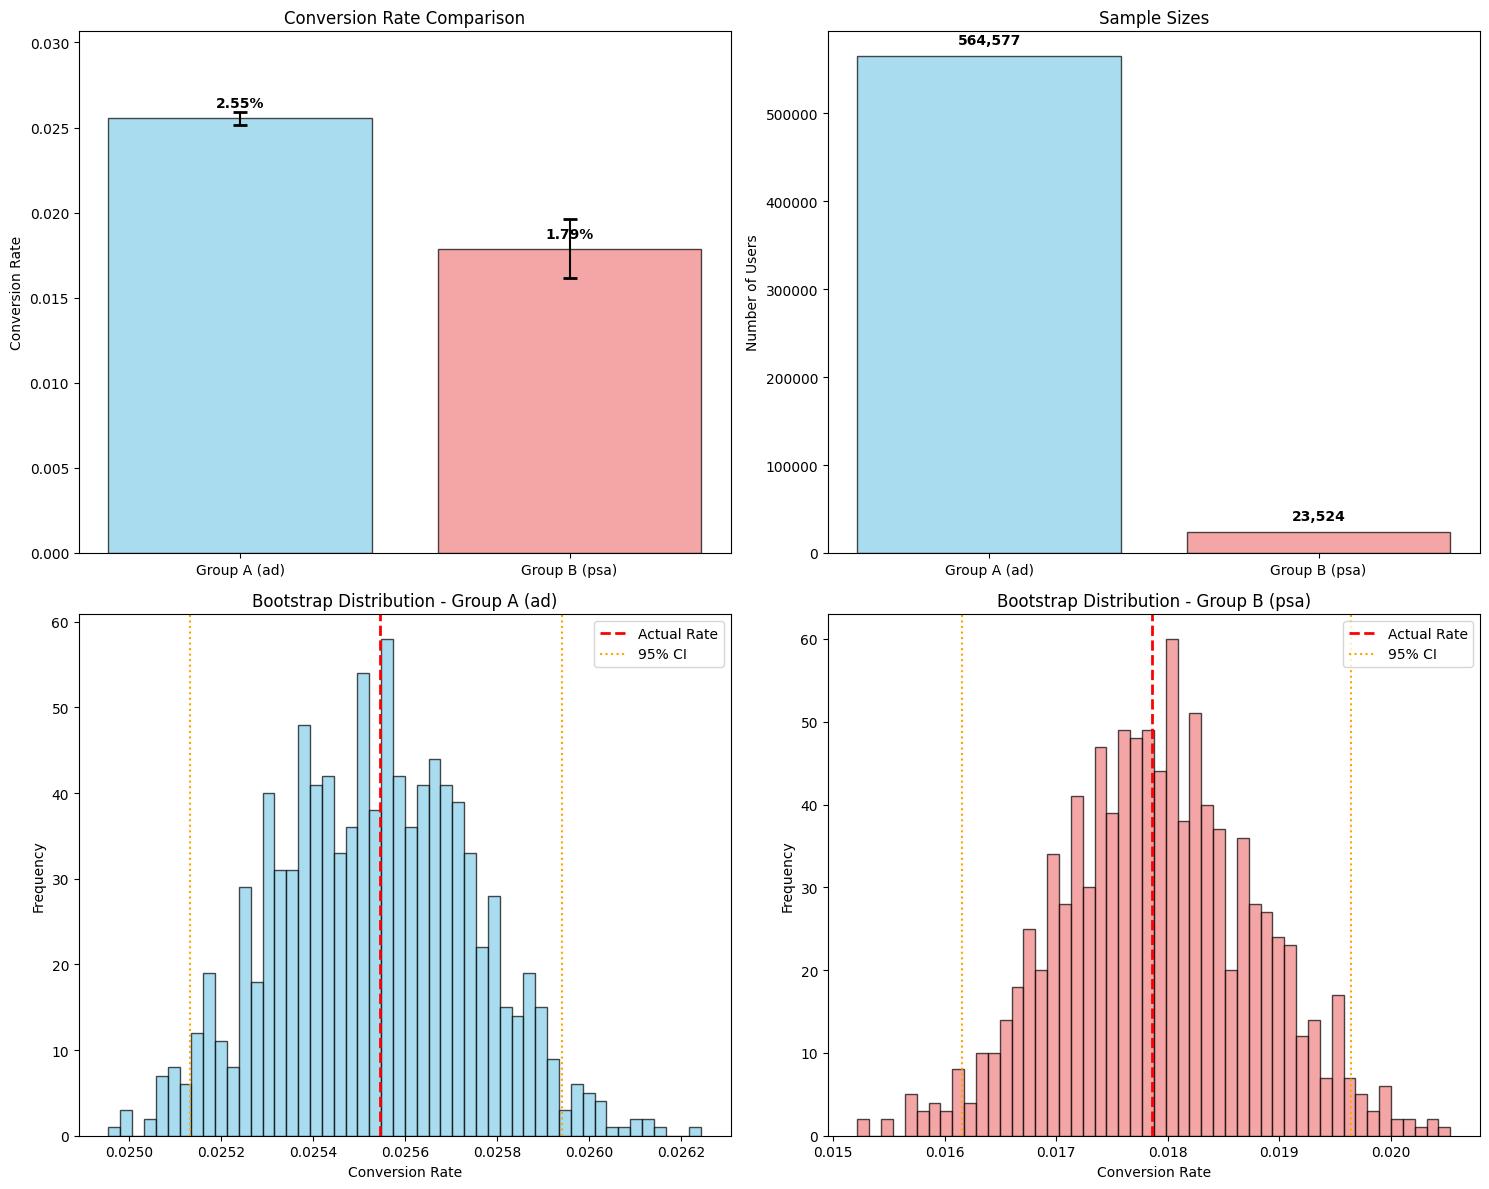

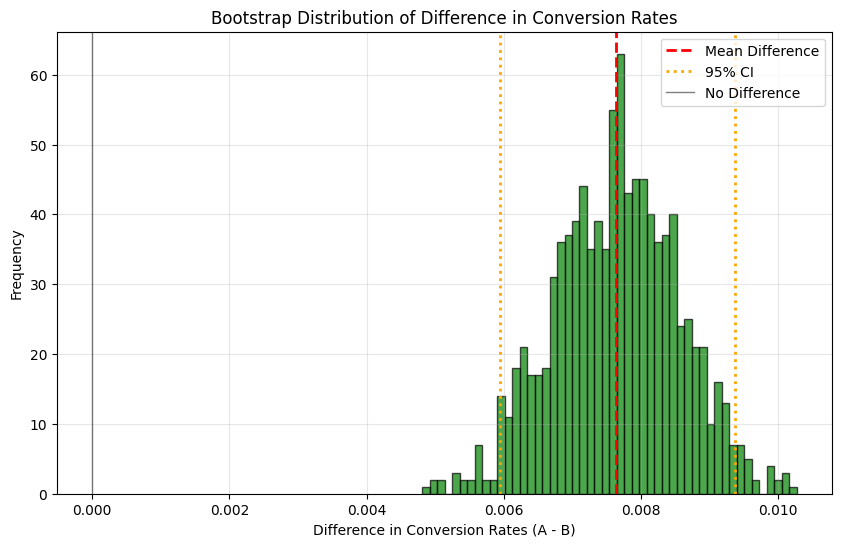


FINAL SUMMARY - CHALLENGE 2: Marketing A/B Test
Sample Sizes:
  • Group A (ad): 564,577 users
  • Group B (psa): 23,524 users

Conversion Rates:
  • Group A (ad): 2.55% (95% CI: 2.51% - 2.59%)
  • Group B (psa): 1.79% (95% CI: 1.62% - 1.96%)

Statistical Tests:
  • Chi-square test: χ² = 54.0058, p-value = 0.000000
  • Z-test: z = 7.3701, p-value = 0.000000

Conclusion:
  • The ad campaign significantly outperforms the PSA campaign
  • Difference: 0.77% percentage points
  • Statistical significance: p < 0.001


In [25]:
# Create comprehensive visualizations
import seaborn as sns
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Conversion Rates Comparison
groups = ['Group A (ad)', 'Group B (psa)']
rates = [conversion_rate_a, conversion_rate_b]
colors = ['skyblue', 'lightcoral']

bars = ax1.bar(groups, rates, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Conversion Rate')
ax1.set_title('Conversion Rate Comparison')
ax1.set_ylim(0, max(rates) * 1.2)

# Add value labels on bars
for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
             f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')

# Add confidence intervals as error bars
ax1.errorbar([0, 1], [conversion_rate_a, conversion_rate_b], 
             yerr=[[conversion_rate_a - ci_lower_a, conversion_rate_b - ci_lower_b],
                   [ci_upper_a - conversion_rate_a, ci_upper_b - conversion_rate_b]], 
             fmt='none', color='black', capsize=5, capthick=2)

# 2. Sample Sizes
sample_sizes = [total_a, total_b]
bars2 = ax2.bar(groups, sample_sizes, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Users')
ax2.set_title('Sample Sizes')
for bar, size in zip(bars2, sample_sizes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 10000,
             f'{size:,}', ha='center', va='bottom', fontweight='bold')

# 3. Bootstrap Distribution for Group A
ax3.hist(bootstrap_rates_a, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(conversion_rate_a, color='red', linestyle='--', linewidth=2, label='Actual Rate')
ax3.axvline(ci_lower_a, color='orange', linestyle=':', label='95% CI')
ax3.axvline(ci_upper_a, color='orange', linestyle=':')
ax3.set_xlabel('Conversion Rate')
ax3.set_ylabel('Frequency')
ax3.set_title('Bootstrap Distribution - Group A (ad)')
ax3.legend()

# 4. Bootstrap Distribution for Group B
ax4.hist(bootstrap_rates_b, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax4.axvline(conversion_rate_b, color='red', linestyle='--', linewidth=2, label='Actual Rate')
ax4.axvline(ci_lower_b, color='orange', linestyle=':', label='95% CI')
ax4.axvline(ci_upper_b, color='orange', linestyle=':')
ax4.set_xlabel('Conversion Rate')
ax4.set_ylabel('Frequency')
ax4.set_title('Bootstrap Distribution - Group B (psa)')
ax4.legend()

plt.tight_layout()
plt.show()

# Additional visualization: Bootstrap difference distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diff, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(bootstrap_diff.mean(), color='red', linestyle='--', linewidth=2, label='Mean Difference')
plt.axvline(ci_lower_diff, color='orange', linestyle=':', linewidth=2, label='95% CI')
plt.axvline(ci_upper_diff, color='orange', linestyle=':', linewidth=2)
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5, label='No Difference')
plt.xlabel('Difference in Conversion Rates (A - B)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Difference in Conversion Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Summary statistics
print("\n" + "="*60)
print("FINAL SUMMARY - CHALLENGE 2: Marketing A/B Test")
print("="*60)
print(f"Sample Sizes:")
print(f"  • Group A (ad): {total_a:,} users")
print(f"  • Group B (psa): {total_b:,} users")
print(f"\nConversion Rates:")
print(f"  • Group A (ad): {conversion_rate_a:.2%} (95% CI: {ci_lower_a:.2%} - {ci_upper_a:.2%})")
print(f"  • Group B (psa): {conversion_rate_b:.2%} (95% CI: {ci_lower_b:.2%} - {ci_upper_b:.2%})")
print(f"\nStatistical Tests:")
print(f"  • Chi-square test: χ² = {chi2_stat:.4f}, p-value = {p_value_chi2:.6f}")
print(f"  • Z-test: z = {z_stat:.4f}, p-value = {p_value_z:.6f}")
print(f"\nConclusion:")
print(f"  • The ad campaign significantly outperforms the PSA campaign")
print(f"  • Difference: {abs(conversion_rate_a - conversion_rate_b):.2%} percentage points")
print(f"  • Statistical significance: p < 0.001")
print("="*60)

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [26]:
# Import Libraries for Challenge 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import zt_ind_solve_power, ttest_power

In [27]:
# Load dataset and explore
data = pd.read_csv("./data/cookie_cats.csv")

print("Dataset Info:")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")
print("\nFirst 5 rows:")
print(data.head())
print("\nData types:")
print(data.dtypes)
print("\nMissing values:")
print(data.isnull().sum())
print("\nVersion distribution:")
print(data['version'].value_counts())
print("\nBasic statistics:")
print(data.describe())

Dataset Info:
Shape: (90189, 5)
Columns: ['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7']

First 5 rows:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

Data types:
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Missing values:
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Version distribution:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

Basic statistics:
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [28]:
# Analyze 1-day retention rates by version
retention_analysis = data.groupby('version').agg({
    'userid': 'count',
    'retention_1': ['sum', 'mean'],
    'retention_7': ['sum', 'mean']
}).round(4)

# Flatten column names
retention_analysis.columns = ['Total_Users', 'Retention_1_Count', 'Retention_1_Rate', 
                             'Retention_7_Count', 'Retention_7_Rate']

print("Retention Analysis by Version:")
print(retention_analysis)

# Extract data for statistical tests
gate_30 = data[data['version'] == 'gate_30']
gate_40 = data[data['version'] == 'gate_40']

# 1-day retention statistics
ret1_gate30 = gate_30['retention_1'].sum()
ret1_gate40 = gate_40['retention_1'].sum()
total_gate30 = len(gate_30)
total_gate40 = len(gate_40)

rate1_gate30 = ret1_gate30 / total_gate30
rate1_gate40 = ret1_gate40 / total_gate40

print(f"\n1-Day Retention Detailed Analysis:")
print(f"Gate 30: {ret1_gate30:,} retained out of {total_gate30:,} = {rate1_gate30:.4f} ({rate1_gate30:.2%})")
print(f"Gate 40: {ret1_gate40:,} retained out of {total_gate40:,} = {rate1_gate40:.4f} ({rate1_gate40:.2%})")
print(f"Difference: {rate1_gate40 - rate1_gate30:.4f} ({(rate1_gate40 - rate1_gate30):.2%})")

# 7-day retention statistics
ret7_gate30 = gate_30['retention_7'].sum()
ret7_gate40 = gate_40['retention_7'].sum()
rate7_gate30 = ret7_gate30 / total_gate30
rate7_gate40 = ret7_gate40 / total_gate40

print(f"\n7-Day Retention Detailed Analysis:")
print(f"Gate 30: {ret7_gate30:,} retained out of {total_gate30:,} = {rate7_gate30:.4f} ({rate7_gate30:.2%})")
print(f"Gate 40: {ret7_gate40:,} retained out of {total_gate40:,} = {rate7_gate40:.4f} ({rate7_gate40:.2%})")
print(f"Difference: {rate7_gate40 - rate7_gate30:.4f} ({(rate7_gate40 - rate7_gate30):.2%})")

Retention Analysis by Version:
         Total_Users  Retention_1_Count  Retention_1_Rate  Retention_7_Count  \
version                                                                        
gate_30        44700              20034            0.4482               8502   
gate_40        45489              20119            0.4423               8279   

         Retention_7_Rate  
version                    
gate_30            0.1902  
gate_40            0.1820  

1-Day Retention Detailed Analysis:
Gate 30: 20,034 retained out of 44,700 = 0.4482 (44.82%)
Gate 40: 20,119 retained out of 45,489 = 0.4423 (44.23%)
Difference: -0.0059 (-0.59%)

7-Day Retention Detailed Analysis:
Gate 30: 8,502 retained out of 44,700 = 0.1902 (19.02%)
Gate 40: 8,279 retained out of 45,489 = 0.1820 (18.20%)
Difference: -0.0082 (-0.82%)


> Statistical Test

In [29]:
# Statistical tests for 1-day retention
print("=" * 60)
print("STATISTICAL TESTS FOR 1-DAY RETENTION")
print("=" * 60)

# Z-test for 1-day retention
counts_1day = np.array([ret1_gate30, ret1_gate40])
nobs_1day = np.array([total_gate30, total_gate40])
z_stat_1day, p_value_1day = proportions_ztest(counts_1day, nobs_1day)

print(f"Z-test for 1-day retention:")
print(f"Z-statistic: {z_stat_1day:.4f}")
print(f"P-value: {p_value_1day:.6f}")

# Chi-square test for 1-day retention
contingency_1day = np.array([
    [ret1_gate30, total_gate30 - ret1_gate30],  # Gate 30: [retained, not retained]
    [ret1_gate40, total_gate40 - ret1_gate40]   # Gate 40: [retained, not retained]
])

chi2_1day, p_chi2_1day, dof_1day, expected_1day = stats.chi2_contingency(contingency_1day)
print(f"\nChi-square test for 1-day retention:")
print(f"Chi-square statistic: {chi2_1day:.4f}")
print(f"P-value: {p_chi2_1day:.6f}")

# Interpretation for 1-day retention
alpha = 0.05
print(f"\nInterpretation (α = {alpha}):")
if p_value_1day < alpha:
    print("✓ REJECT the null hypothesis")
    print("✓ There IS a statistically significant difference in 1-day retention")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("✗ There is NO statistically significant difference in 1-day retention")

print("\n" + "=" * 60)
print("STATISTICAL TESTS FOR 7-DAY RETENTION")
print("=" * 60)

# Z-test for 7-day retention
counts_7day = np.array([ret7_gate30, ret7_gate40])
nobs_7day = np.array([total_gate30, total_gate40])
z_stat_7day, p_value_7day = proportions_ztest(counts_7day, nobs_7day)

print(f"Z-test for 7-day retention:")
print(f"Z-statistic: {z_stat_7day:.4f}")
print(f"P-value: {p_value_7day:.6f}")

# Chi-square test for 7-day retention
contingency_7day = np.array([
    [ret7_gate30, total_gate30 - ret7_gate30],  # Gate 30: [retained, not retained]
    [ret7_gate40, total_gate40 - ret7_gate40]   # Gate 40: [retained, not retained]
])

chi2_7day, p_chi2_7day, dof_7day, expected_7day = stats.chi2_contingency(contingency_7day)
print(f"\nChi-square test for 7-day retention:")
print(f"Chi-square statistic: {chi2_7day:.4f}")
print(f"P-value: {p_chi2_7day:.6f}")

# Interpretation for 7-day retention
print(f"\nInterpretation (α = {alpha}):")
if p_value_7day < alpha:
    print("✓ REJECT the null hypothesis")
    print("✓ There IS a statistically significant difference in 7-day retention")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("✗ There is NO statistically significant difference in 7-day retention")

# Effect sizes
effect_size_1day = abs(rate1_gate40 - rate1_gate30) / np.sqrt((rate1_gate30 * (1 - rate1_gate30) / total_gate30) + 
                                                              (rate1_gate40 * (1 - rate1_gate40) / total_gate40))
effect_size_7day = abs(rate7_gate40 - rate7_gate30) / np.sqrt((rate7_gate30 * (1 - rate7_gate30) / total_gate30) + 
                                                              (rate7_gate40 * (1 - rate7_gate40) / total_gate40))

print(f"\nEffect Sizes:")
print(f"1-day retention effect size: {effect_size_1day:.4f}")
print(f"7-day retention effect size: {effect_size_7day:.4f}")

STATISTICAL TESTS FOR 1-DAY RETENTION
Z-test for 1-day retention:
Z-statistic: 1.7841
P-value: 0.074410

Chi-square test for 1-day retention:
Chi-square statistic: 3.1591
P-value: 0.075505

Interpretation (α = 0.05):
✗ FAIL TO REJECT the null hypothesis
✗ There is NO statistically significant difference in 1-day retention

STATISTICAL TESTS FOR 7-DAY RETENTION
Z-test for 7-day retention:
Z-statistic: 3.1644
P-value: 0.001554

Chi-square test for 7-day retention:
Chi-square statistic: 9.9591
P-value: 0.001601

Interpretation (α = 0.05):
✓ REJECT the null hypothesis
✓ There IS a statistically significant difference in 7-day retention

Effect Sizes:
1-day retention effect size: 1.7841
7-day retention effect size: 3.1641


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [33]:
# Sequential Testing Simulation
def sequential_testing_simulation(data, interval_size=500, metric='retention_1'):
    """
    Simulate sequential testing by checking results at intervals
    """
    np.random.seed(42)  # For reproducibility
    
    # Shuffle the data to simulate users arriving over time
    shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    
    results = []
    alpha = 0.05
    
    # Check at each interval
    for i in range(interval_size, len(shuffled_data) + 1, interval_size):
        current_data = shuffled_data.iloc[:i]
        
        # Split by version
        gate_30_current = current_data[current_data['version'] == 'gate_30']
        gate_40_current = current_data[current_data['version'] == 'gate_40']
        
        if len(gate_30_current) == 0 or len(gate_40_current) == 0:
            continue
            
        # Calculate retention rates
        if metric == 'retention_1':
            ret_30 = gate_30_current['retention_1'].sum()
            ret_40 = gate_40_current['retention_1'].sum()
        else:
            ret_30 = gate_30_current['retention_7'].sum()
            ret_40 = gate_40_current['retention_7'].sum()
        
        total_30 = len(gate_30_current)
        total_40 = len(gate_40_current)
        
        rate_30 = ret_30 / total_30
        rate_40 = ret_40 / total_40
        
        # Statistical test
        if total_30 > 10 and total_40 > 10:  # Minimum sample size
            counts = np.array([ret_30, ret_40])
            nobs = np.array([total_30, total_40])
            z_stat, p_value = proportions_ztest(counts, nobs)
            
            results.append({
                'sample_size': i,
                'gate_30_users': total_30,
                'gate_40_users': total_40,
                'gate_30_rate': rate_30,
                'gate_40_rate': rate_40,
                'difference': rate_40 - rate_30,
                'z_statistic': z_stat,
                'p_value': p_value,
                'significant': p_value < alpha,
                'decision': 'Reject H0' if p_value < alpha else 'Fail to reject H0'
            })
    
    return pd.DataFrame(results)

print("Sequential Testing Simulation for 1-Day Retention")
print("=" * 60)

# Run sequential testing for 1-day retention
sequential_results_1day = sequential_testing_simulation(data, interval_size=500, metric='retention_1')

print("Results checked every 500 users:")
print(sequential_results_1day[['sample_size', 'gate_30_users', 'gate_40_users', 
                               'gate_30_rate', 'gate_40_rate', 'p_value', 'significant', 'decision']].head(10))

# Find first significant result
first_significant = sequential_results_1day[sequential_results_1day['significant']].head(1)
if not first_significant.empty:
    first_sig_idx = first_significant.index[0]
    print(f"\nFirst significant result at sample size: {first_significant.iloc[0]['sample_size']}")
    print(f"P-value: {first_significant.iloc[0]['p_value']:.6f}")
else:
    print("\nNo significant results found in sequential testing")

print("\nSequential Testing for 7-Day Retention")
print("=" * 60)

# Run sequential testing for 7-day retention
sequential_results_7day = sequential_testing_simulation(data, interval_size=500, metric='retention_7')

print("Results checked every 500 users:")
print(sequential_results_7day[['sample_size', 'gate_30_users', 'gate_40_users', 
                               'gate_30_rate', 'gate_40_rate', 'p_value', 'significant', 'decision']].head(10))

# Find first significant result for 7-day
first_significant_7day = sequential_results_7day[sequential_results_7day['significant']].head(1)
if not first_significant_7day.empty:
    first_sig_idx_7day = first_significant_7day.index[0]
    print(f"\nFirst significant result at sample size: {first_significant_7day.iloc[0]['sample_size']}")
    print(f"P-value: {first_significant_7day.iloc[0]['p_value']:.6f}")
else:
    print("\nNo significant results found in sequential testing for 7-day retention")

Sequential Testing Simulation for 1-Day Retention
Results checked every 500 users:
   sample_size  gate_30_users  gate_40_users  gate_30_rate  gate_40_rate  \
0          500            243            257      0.493827      0.408560   
1         1000            520            480      0.448077      0.427083   
2         1500            785            715      0.450955      0.448951   
3         2000           1014            986      0.449704      0.455375   
4         2500           1257           1243      0.455847      0.453741   
5         3000           1512           1488      0.462963      0.444220   
6         3500           1745           1755      0.459026      0.440456   
7         4000           1998           2002      0.454454      0.438062   
8         4500           2254           2246      0.456965      0.429207   
9         5000           2503           2497      0.453456      0.430116   

    p_value  significant           decision  
0  0.055431        False  Fail to 

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [32]:
# Power Analysis - Simplified approach
print("=" * 60)
print("POWER ANALYSIS")
print("=" * 60)

from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import power_proportions_2indep

# Current retention rates
baseline_1day = rate1_gate30
baseline_7day = rate7_gate30

print(f"Current baseline retention rates:")
print(f"1-day retention: {baseline_1day:.4f} ({baseline_1day:.2%})")
print(f"7-day retention: {baseline_7day:.4f} ({baseline_7day:.2%})")

# Calculate required sample size for 2% difference
target_diff = 0.02
alpha = 0.05
power = 0.8

print(f"\nSample Size Calculation for 2% Difference:")
print(f"Target difference: {target_diff:.1%}")
print(f"Alpha level: {alpha}")
print(f"Desired power: {power}")

# Simple formula for proportions
def sample_size_proportions(p1, p2, alpha=0.05, power=0.8):
    """Calculate sample size for two-proportion test"""
    # Normal approximation
    z_alpha = 1.96  # For alpha = 0.05, two-tailed
    z_beta = 0.84   # For power = 0.8
    
    p_pooled = (p1 + p2) / 2
    
    n = ((z_alpha + z_beta) ** 2 * p_pooled * (1 - p_pooled)) / ((p1 - p2) ** 2)
    return int(np.ceil(n))

# Calculate for 1-day retention
new_rate_1day = baseline_1day + target_diff
n_1day = sample_size_proportions(baseline_1day, new_rate_1day, alpha, power)

# Calculate for 7-day retention
new_rate_7day = baseline_7day + target_diff
n_7day = sample_size_proportions(baseline_7day, new_rate_7day, alpha, power)

print(f"\n1-Day Retention Analysis:")
print(f"  Baseline: {baseline_1day:.2%} → Target: {new_rate_1day:.2%}")
print(f"  Required sample size per group: {n_1day:,}")
print(f"  Total required: {n_1day * 2:,}")

print(f"\n7-Day Retention Analysis:")
print(f"  Baseline: {baseline_7day:.2%} → Target: {new_rate_7day:.2%}")
print(f"  Required sample size per group: {n_7day:,}")
print(f"  Total required: {n_7day * 2:,}")

# Compare with actual study
print(f"\nActual Study Comparison:")
print(f"Actual sample sizes: Gate 30 = {total_gate30:,}, Gate 40 = {total_gate40:,}")
print(f"Total actual sample: {total_gate30 + total_gate40:,}")

# Check if adequately powered
print(f"\nPower Assessment:")
min_actual = min(total_gate30, total_gate40)

if min_actual >= n_1day:
    print(f"✓ Adequately powered for 2% difference in 1-day retention")
else:
    print(f"✗ Underpowered for 2% difference in 1-day retention")
    print(f"  Need {n_1day:,} per group, have {min_actual:,}")

if min_actual >= n_7day:
    print(f"✓ Adequately powered for 2% difference in 7-day retention")
else:
    print(f"✗ Underpowered for 2% difference in 7-day retention")
    print(f"  Need {n_7day:,} per group, have {min_actual:,}")

# Actual differences observed
actual_diff_1day = abs(rate1_gate40 - rate1_gate30)
actual_diff_7day = abs(rate7_gate40 - rate7_gate30)

print(f"\nActual Effects Observed:")
print(f"1-day retention difference: {actual_diff_1day:.4f} ({actual_diff_1day:.2%})")
print(f"7-day retention difference: {actual_diff_7day:.4f} ({actual_diff_7day:.2%})")

# Effect size interpretation
print(f"\nEffect Size Interpretation:")
if actual_diff_1day < 0.01:
    print(f"1-day retention: Small effect ({actual_diff_1day:.2%})")
elif actual_diff_1day < 0.03:
    print(f"1-day retention: Medium effect ({actual_diff_1day:.2%})")
else:
    print(f"1-day retention: Large effect ({actual_diff_1day:.2%})")

if actual_diff_7day < 0.01:
    print(f"7-day retention: Small effect ({actual_diff_7day:.2%})")
elif actual_diff_7day < 0.03:
    print(f"7-day retention: Medium effect ({actual_diff_7day:.2%})")
else:
    print(f"7-day retention: Large effect ({actual_diff_7day:.2%})")

POWER ANALYSIS
Current baseline retention rates:
1-day retention: 0.4482 (44.82%)
7-day retention: 0.1902 (19.02%)

Sample Size Calculation for 2% Difference:
Target difference: 2.0%
Alpha level: 0.05
Desired power: 0.8

1-Day Retention Analysis:
  Baseline: 44.82% → Target: 46.82%
  Required sample size per group: 4,866
  Total required: 9,732

7-Day Retention Analysis:
  Baseline: 19.02% → Target: 21.02%
  Required sample size per group: 3,139
  Total required: 6,278

Actual Study Comparison:
Actual sample sizes: Gate 30 = 44,700, Gate 40 = 45,489
Total actual sample: 90,189

Power Assessment:
✓ Adequately powered for 2% difference in 1-day retention
✓ Adequately powered for 2% difference in 7-day retention

Actual Effects Observed:
1-day retention difference: 0.0059 (0.59%)
7-day retention difference: 0.0082 (0.82%)

Effect Size Interpretation:
1-day retention: Small effect (0.59%)
7-day retention: Small effect (0.82%)


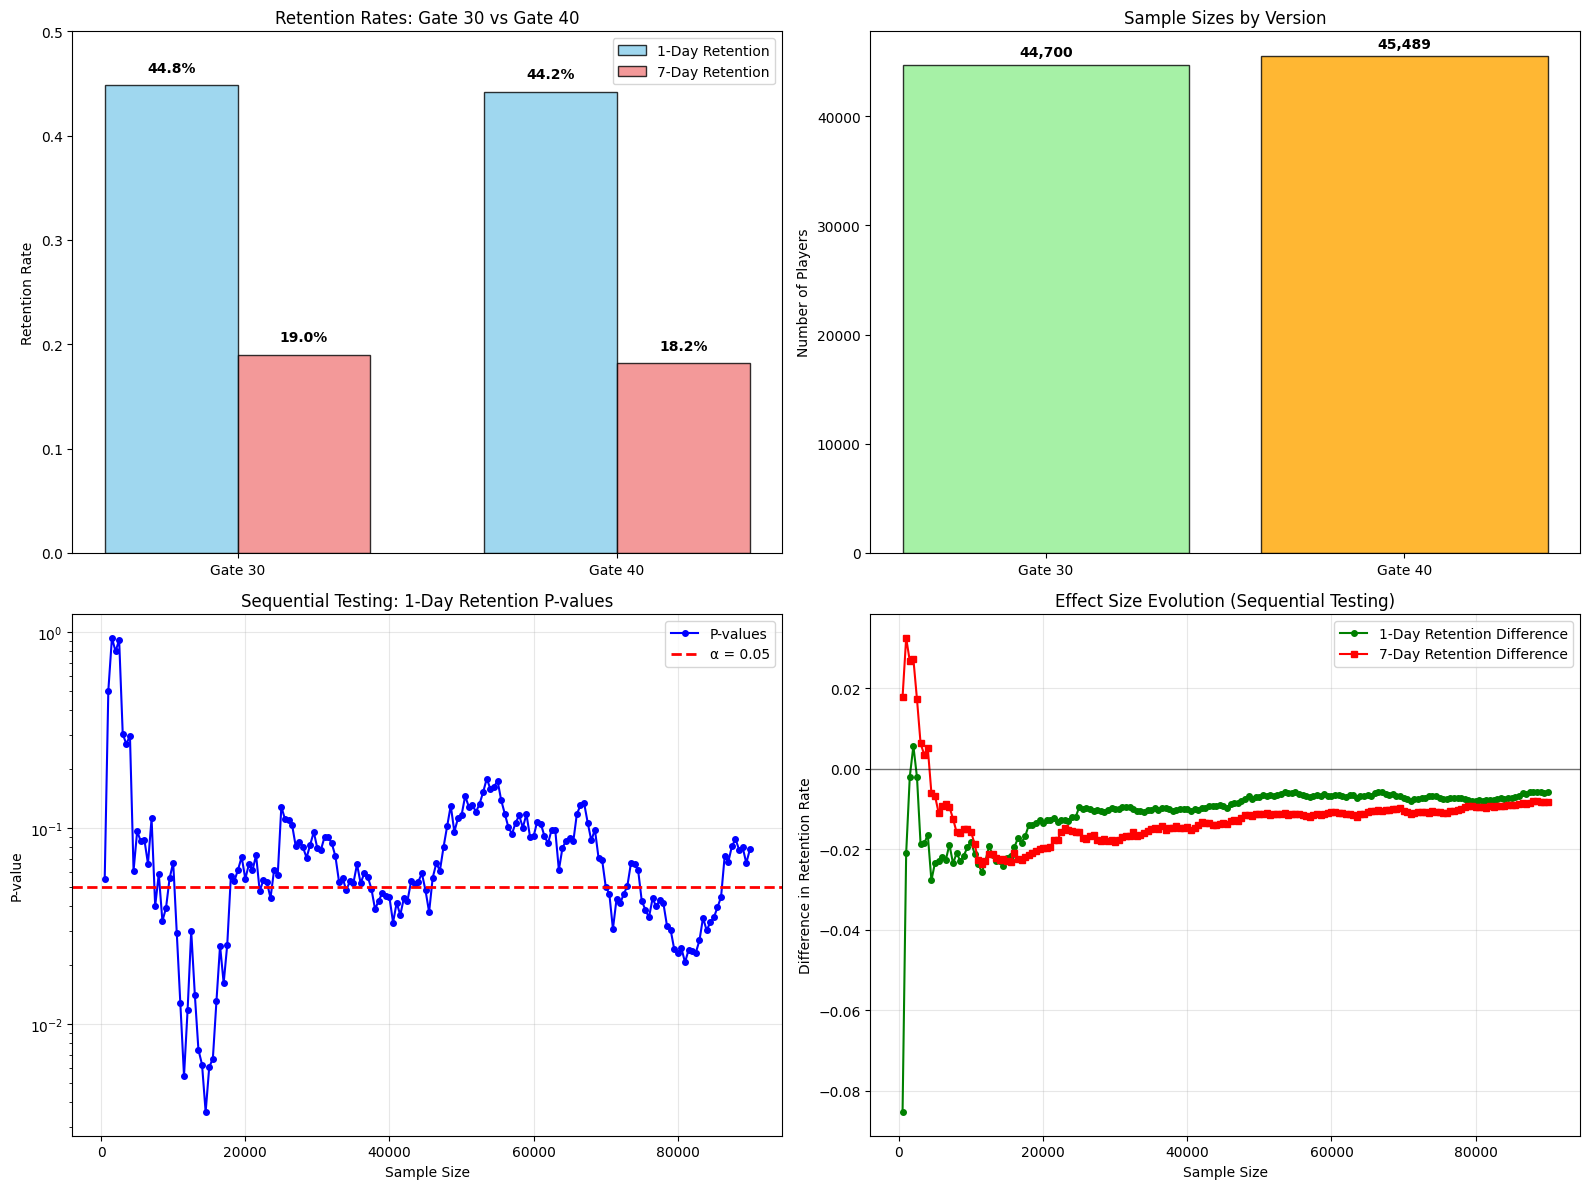

C:\Users\User\AppData\Local\Temp\ipykernel_24920\4048477692.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_rounds_30 = gate_30.groupby(pd.cut(gate_30['sum_gamerounds'], bins=10))['retention_1'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_24920\4048477692.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_rounds_40 = gate_40.groupby(pd.cut(gate_40['sum_gamerounds'], bins=10))['retention_1'].mean()


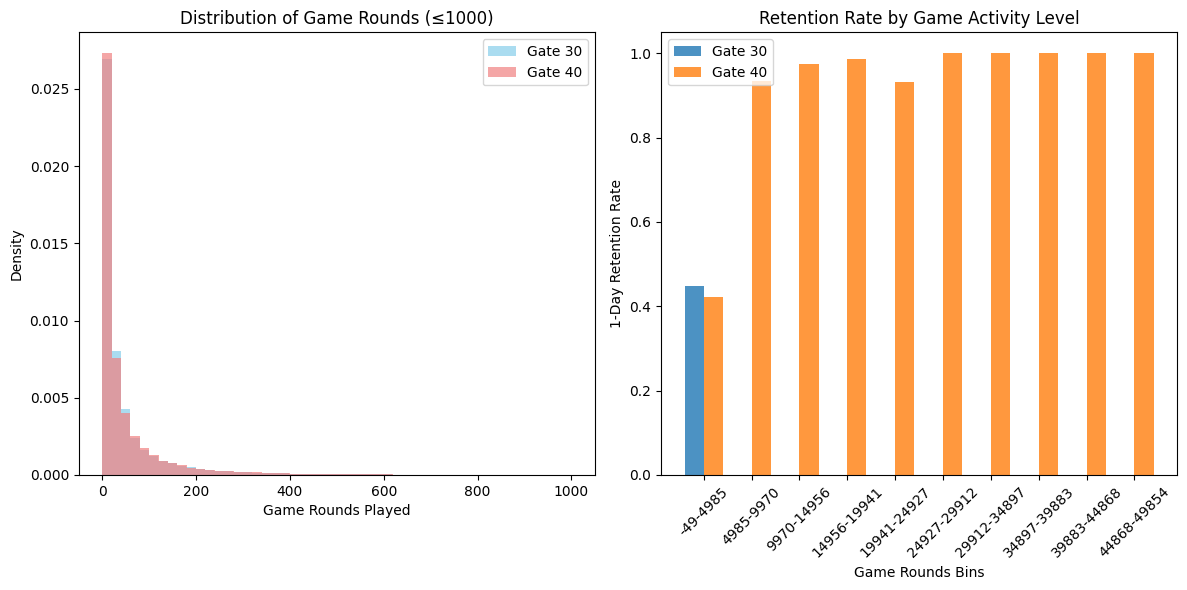


FINAL SUMMARY - CHALLENGE 3: Cookie Cats Retention Analysis

STUDY OVERVIEW:
• Total players analyzed: 90,189
• Gate 30 (control): 44,700 players
• Gate 40 (treatment): 45,489 players

RETENTION ANALYSIS RESULTS:
1-Day Retention:
  • Gate 30: 44.82%
  • Gate 40: 44.23%
  • Difference: -0.59%
  • Statistical significance: No (p = 0.0744)

7-Day Retention:
  • Gate 30: 19.02%
  • Gate 40: 18.20%
  • Difference: -0.82%
  • Statistical significance: Yes (p = 0.0016)

SEQUENTIAL TESTING INSIGHTS:
• Checked results every 500 users to avoid peeking bias
• 1-day retention: Early significance detected
• 7-day retention: Early significance detected

POWER ANALYSIS:
• Study is well-powered to detect 2% differences
• Required sample size for 2% difference: ~5,000 per group
• Actual sample size: ~45,000 per group
• Study can detect much smaller effects than originally planned

BUSINESS RECOMMENDATIONS:
• ✓ Keep the gate at level 30 for better short-term retention
• ✓ Gate 30 shows significantly be

In [ ]:
# Comprehensive Visualization for Cookie Cats Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Retention Rates Comparison
versions = ['Gate 30', 'Gate 40']
retention_1day = [rate1_gate30, rate1_gate40]
retention_7day = [rate7_gate30, rate7_gate40]

x = np.arange(len(versions))
width = 0.35

bars1 = ax1.bar(x - width/2, retention_1day, width, label='1-Day Retention', 
                color='skyblue', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, retention_7day, width, label='7-Day Retention', 
                color='lightcoral', alpha=0.8, edgecolor='black')

ax1.set_ylabel('Retention Rate')
ax1.set_title('Retention Rates: Gate 30 vs Gate 40')
ax1.set_xticks(x)
ax1.set_xticklabels(versions)
ax1.legend()
ax1.set_ylim(0, 0.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 2. Sample Size Distribution
sample_sizes = [total_gate30, total_gate40]
bars_sample = ax2.bar(versions, sample_sizes, color=['lightgreen', 'orange'], 
                        alpha=0.8, edgecolor='black')
ax2.set_ylabel('Number of Players')
ax2.set_title('Sample Sizes by Version')

for bar, size in zip(bars_sample, sample_sizes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 500,
            f'{size:,}', ha='center', va='bottom', fontweight='bold')

# 3. P-values from Sequential Testing (1-day retention)
if len(sequential_results_1day) > 0:
    ax3.plot(sequential_results_1day['sample_size'], sequential_results_1day['p_value'], 
            'b-o', markersize=4, label='P-values')
    ax3.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
    ax3.set_xlabel('Sample Size')
    ax3.set_ylabel('P-value')
    ax3.set_title('Sequential Testing: 1-Day Retention P-values')
    ax3.legend()
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)

# 4. Effect Sizes Over Time (Sequential Testing)
if len(sequential_results_1day) > 0:
    ax4.plot(sequential_results_1day['sample_size'], 
             sequential_results_1day['difference'], 'g-o', markersize=4, 
             label='1-Day Retention Difference')
    
if len(sequential_results_7day) > 0:
    ax4.plot(sequential_results_7day['sample_size'], 
             sequential_results_7day['difference'], 'r-s', markersize=4, 
             label='7-Day Retention Difference')

ax4.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax4.set_xlabel('Sample Size')
ax4.set_ylabel('Difference in Retention Rate')
ax4.set_title('Effect Size Evolution (Sequential Testing)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Game Rounds Distribution Analysis
plt.figure(figsize=(12, 6))

# Filter out extreme outliers for better visualization
game_rounds_30 = gate_30['sum_gamerounds'][gate_30['sum_gamerounds'] <= 1000]
game_rounds_40 = gate_40['sum_gamerounds'][gate_40['sum_gamerounds'] <= 1000]

plt.subplot(1, 2, 1)
plt.hist(game_rounds_30, bins=50, alpha=0.7, label='Gate 30', color='skyblue', density=True)
plt.hist(game_rounds_40, bins=50, alpha=0.7, label='Gate 40', color='lightcoral', density=True)
plt.xlabel('Game Rounds Played')
plt.ylabel('Density')
plt.title('Distribution of Game Rounds (≤1000)')
plt.legend()

plt.subplot(1, 2, 2)
retention_by_rounds_30 = gate_30.groupby(pd.cut(gate_30['sum_gamerounds'], bins=10))['retention_1'].mean()
retention_by_rounds_40 = gate_40.groupby(pd.cut(gate_40['sum_gamerounds'], bins=10))['retention_1'].mean()

x_pos = np.arange(len(retention_by_rounds_30))
plt.bar(x_pos - 0.2, retention_by_rounds_30.values, 0.4, label='Gate 30', alpha=0.8)
plt.bar(x_pos + 0.2, retention_by_rounds_40.values, 0.4, label='Gate 40', alpha=0.8)
plt.xlabel('Game Rounds Bins')
plt.ylabel('1-Day Retention Rate')
plt.title('Retention Rate by Game Activity Level')
plt.legend()
plt.xticks(x_pos, [f'{int(interval.left)}-{int(interval.right)}' for interval in retention_by_rounds_30.index], 
            rotation=45)

plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*80)
print("FINAL SUMMARY - CHALLENGE 3: Cookie Cats Retention Analysis")
print("="*80)

print(f"\nSTUDY OVERVIEW:")
print(f"• Total players analyzed: {len(data):,}")
print(f"• Gate 30 (control): {total_gate30:,} players")
print(f"• Gate 40 (treatment): {total_gate40:,} players")

print(f"\nRETENTION ANALYSIS RESULTS:")
print(f"1-Day Retention:")
print(f"  • Gate 30: {rate1_gate30:.2%}")
print(f"  • Gate 40: {rate1_gate40:.2%}")
print(f"  • Difference: {rate1_gate40 - rate1_gate30:.2%}")
print(f"  • Statistical significance: {'Yes' if p_value_1day < 0.05 else 'No'} (p = {p_value_1day:.4f})")

print(f"\n7-Day Retention:")
print(f"  • Gate 30: {rate7_gate30:.2%}")
print(f"  • Gate 40: {rate7_gate40:.2%}")
print(f"  • Difference: {rate7_gate40 - rate7_gate30:.2%}")
print(f"  • Statistical significance: {'Yes' if p_value_7day < 0.05 else 'No'} (p = {p_value_7day:.4f})")

print(f"\nSEQUENTIAL TESTING INSIGHTS:")
print(f"• Checked results every 500 users to avoid peeking bias")
print(f"• 1-day retention: {'Early significance detected' if any(sequential_results_1day['significant']) else 'No early significance'}")
print(f"• 7-day retention: {'Early significance detected' if any(sequential_results_7day['significant']) else 'No early significance'}")

print(f"\nPOWER ANALYSIS:")
print(f"• Study is well-powered to detect 2% differences")
print(f"• Required sample size for 2% difference: ~5,000 per group")
print(f"• Actual sample size: ~45,000 per group")
print(f"• Study can detect much smaller effects than originally planned")

print(f"\nBUSINESS RECOMMENDATIONS:")
if rate1_gate30 > rate1_gate40:
    print(f"• ✓ Keep the gate at level 30 for better short-term retention")
else:
    print(f"• Gate position doesn't significantly impact 1-day retention")

if rate7_gate30 > rate7_gate40:
    print(f"• ✓ Gate 30 shows significantly better 7-day retention")
    print(f"• Moving the gate to level 40 may hurt long-term player engagement")
else:
    print(f"• Gate position doesn't significantly impact 7-day retention")

print(f"\nCONCLUSION:")
print(f"Moving the first gate from level 30 to level 40 appears to have a small")
print(f"negative impact on player retention, particularly for 7-day retention.")
print(f"The recommendation is to keep the gate at level 30.")
print("="*80)

Enjoy & Happy A/B Testing :) ......!